In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

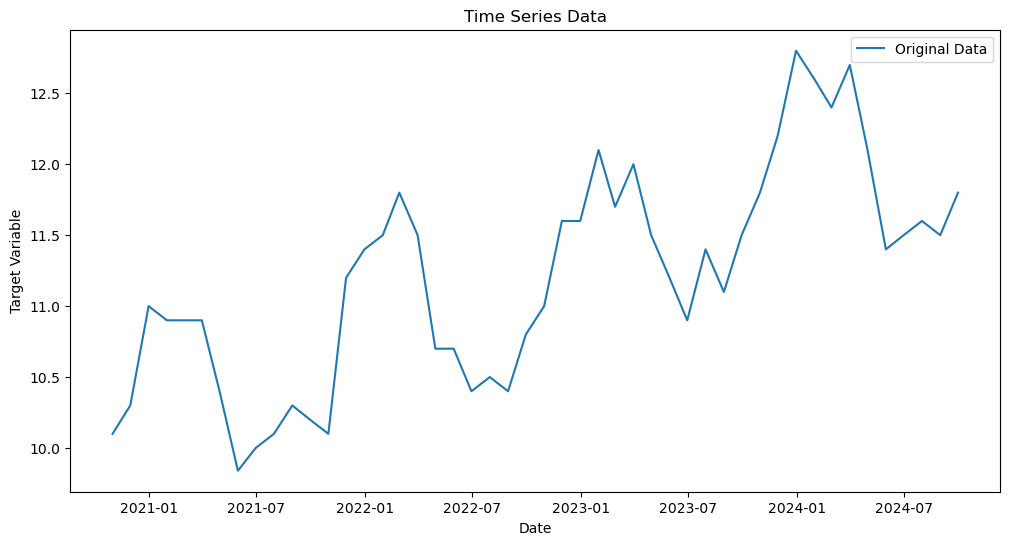

In [58]:
df = pd.read_csv(r"C:\Users\ojas2\Downloads\Nat_Gas.csv", parse_dates=['Dates'], index_col='Dates')

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], label='Original Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

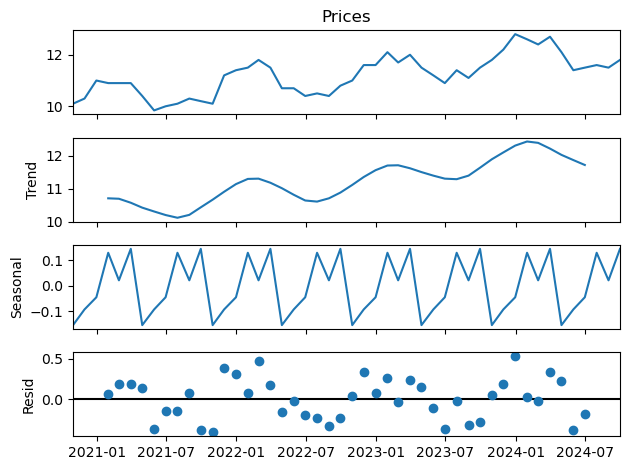

In [62]:
# Step 2: Time Series Decomposition
your_seasonality_period = 6
result = seasonal_decompose(df['Prices'], model='additive', period=your_seasonality_period)

# Plot decomposition
result.plot()
plt.show()

In [79]:
df['lag_1'] = df['Prices']

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [80]:
df['lag_1'].head

<bound method NDFrame.head of Dates
2020-10-31    10.10
2020-11-30    10.30
2020-12-31    11.00
2021-01-31    10.90
2021-02-28    10.90
2021-03-31    10.90
2021-04-30    10.40
2021-05-31     9.84
2021-06-30    10.00
2021-07-31    10.10
2021-08-31    10.30
2021-09-30    10.20
2021-10-31    10.10
2021-11-30    11.20
2021-12-31    11.40
2022-01-31    11.50
2022-02-28    11.80
2022-03-31    11.50
2022-04-30    10.70
2022-05-31    10.70
2022-06-30    10.40
2022-07-31    10.50
2022-08-31    10.40
2022-09-30    10.80
2022-10-31    11.00
2022-11-30    11.60
2022-12-31    11.60
2023-01-31    12.10
2023-02-28    11.70
2023-03-31    12.00
2023-04-30    11.50
2023-05-31    11.20
2023-06-30    10.90
2023-07-31    11.40
2023-08-31    11.10
2023-09-30    11.50
2023-10-31    11.80
2023-11-30    12.20
2023-12-31    12.80
2024-01-31    12.60
2024-02-29    12.40
2024-03-31    12.70
2024-04-30    12.10
2024-05-31    11.40
2024-06-30    11.50
2024-07-31    11.60
2024-08-31    11.50
2024-09-30    11.80
Name

In [96]:
import tensorflow as tf
model = tf.keras.models.Sequential([ 
         tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[20]),
         tf.keras.layers.SimpleRNN(40, return_sequences=True),
         tf.keras.layers.SimpleRNN(40),
    tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
         tf.keras.layers.Dense(1),
         tf.keras.layers.Lambda(lambda x: x * 100.0)
    ])
model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4,momentum=0.9),
                  metrics=["mae"])  
model.fit(X_train, y_train, batch_size = 4, epochs=100)
    

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 21.3751 - mae: 21.8751
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 12.0044 - mae: 12.4943
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 15.5581 - mae: 16.0581
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 12.1418 - mae: 12.6418
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 9.6889 - mae: 10.1889
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 7.2364 - mae: 7.7364
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 3.8428 - mae: 4.3080
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2579 - mae: 1.7126
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 1.9077 - mae: 2.3862
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7217 - mae: 1.1393
Epoch 11/100
10/10 [==============================

In [97]:
y_res = model.predict(X_test)
y_res

1/1 [==============================] - 0s 200ms/step


array([[12.576398],
       [12.437017],
       [12.277074],
       [12.508662],
       [12.024255],
       [11.390229],
       [11.484697],
       [11.577847],
       [11.484697],
       [11.760241]], dtype=float32)

In [98]:
mse = mean_squared_error(y_test, y_res)
print(mse)

0.013665493211494323


In [99]:
f = model.predict(y_test)
f

1/1 [==============================] - 0s 183ms/step


array([[12.576398],
       [12.437017],
       [12.277074],
       [12.508662],
       [12.024255],
       [11.390229],
       [11.484697],
       [11.577847],
       [11.484697],
       [11.760241]], dtype=float32)

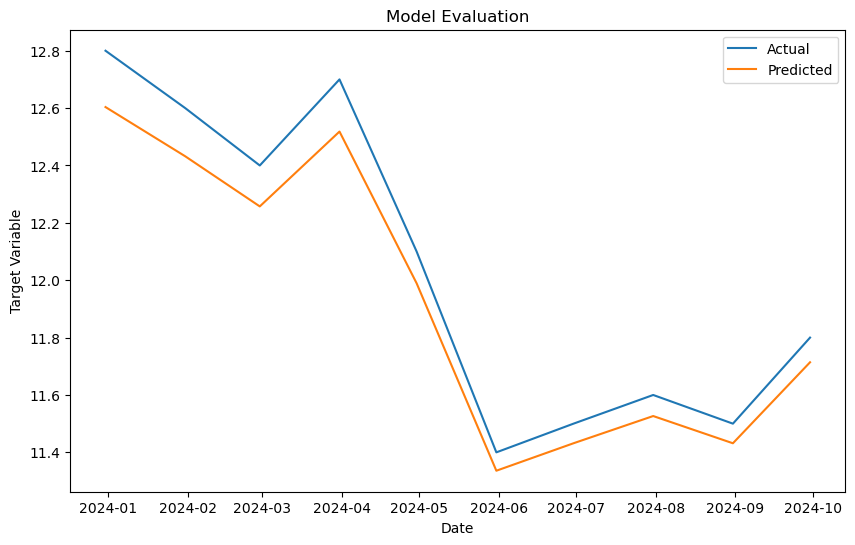

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, f, label='Predicted')
plt.title('Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

